### DS12
The strength of the relationship can be calculated whether the variables are qualitative or quantitative

### DS12

変数が質的、量的どちらの場合でも関係の強さを算出できる

DS9参照
<dl>
    <dt>ピアソンの積率相関</dt>
        <dd>量的データに対して2つの連続変数の線形関係の強さを示す。</dd>
        <dd>最も一般的な相関方法。</dd>
    <dt>スピアマンの順位相関</dt>
        <dd>質的データである順位データに対して2つの変数の単調関係を示す</dd>
        <dd>変数間の関係が直線でない場合に使用する。</dd>
    <dt>量的データ</dt>
        <dd>数値自体に意味があり、足し算や引き算ができるデータ</dd>
        <dd>比例尺度と間隔尺度がある</dd>
        <dd>平均値やさまざまな統計量が使用できる</dd>
    <dt>質的データ</dt>
        <dd>分類や種類を区分するラベルとしてのデータ</dd>
        <dd>順序尺度と名義尺度がある</dd>
        <dd>和、差、平均などの計算は意味をなさない</dd>
</dl>

<dl>
    <dt>単調関係</dt>
        <dd>一方の変数が増加するときに、もう一方の変数が増加または減少し続ける度合い</dd>
        <dd>係数が+1であれば単勝増加、-1であれば単調減少</dd>
</dl>



#### ピアソンの積率相関

相関係数 $r_{xy}$ は以下のように定義され、
$$ r_{xy} = \frac{S_{xy}}{S_xS_y} $$
$S_x$と$S_y$はおのおの$x$と$y$の標準偏差、$S_{xy}は共分散を表し、共分散は以下の式で計算できる。
$$ S_{xy} = \frac{\sum_{i=1}^{n}(x_i-\overline{x})(y_i-\overline{y})}{n} $$

#### スピアマンの順位相関
$$ \rho = 1 - \frac{6 \sum_{i=1}^{N}D^2}{N(N^2-1)} $$


0.9999999999999998
       deg  sales
deg    1.0    1.0
sales  1.0    1.0
1.0
       deg  sales
deg    1.0    1.0
sales  1.0    1.0
0.9534625892455924
            deg     sales
deg    1.000000  0.953463
sales  0.953463  1.000000
-1.9500000000000002
            deg     sales
deg    1.000000  0.974679
sales  0.974679  1.000000


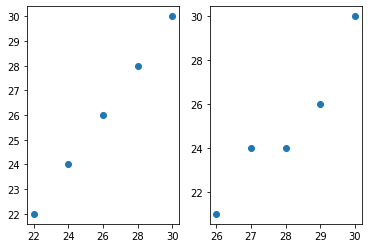

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ピアソンの積率相関
def pearson(std_x, std_y, s_xy):
    r_xy = s_xy / (std_x * std_y)
    return r_xy

# スピアマンの順位相関
def spearman(x, y):
    x = np.array(x)
    y = np.array(y)
    N = len(x)
    return 1 - (6*sum((x -y)**2) / (N*(N**2 - 1)))

# 直線のデータを生成
linear_df = pd.DataFrame([['7/1', 22, 22],['7/5', 24, 24],['7/10', 26, 26],['7/11', 28, 28],['7/12', 30, 30]])
linear_df.columns = ['date', 'deg', 'sales']

# ピアソンの相関係数を計算
std_x = linear_df['deg'].std()
std_y = linear_df['sales'].std()
cov = linear_df.cov()
line_pearson_corr = pearson(std_x, std_y, cov.loc['deg','sales'])
print(line_pearson_corr)

print(linear_df.corr())

# スピアマンの相関係数を計算
line_sp_corr = spearman(linear_df['deg'], linear_df['sales'])
print(line_sp_corr)

print(linear_df.corr(method='spearman'))


# カーブしたデータを生成
curv_df = pd.DataFrame([['7/1', 30, 30],['7/5', 27, 24],['7/10', 28, 24],['7/11', 29, 26],['7/12', 26, 21]])
curv_df.columns = ['date', 'deg', 'sales']

# ピアソンの相関係数を計算
std_x = curv_df['deg'].std()
std_y = curv_df['sales'].std()
cov = curv_df.cov()
curv_pearson_corr = pearson(std_x, std_y, cov.loc['deg','sales'])
print(curv_pearson_corr)

print(curv_df.corr())

# スピアマンの相関係数を計算
curv_sp_corr = spearman(curv_df['deg'], curv_df['sales'])
print(curv_sp_corr) # ????

print(curv_df.corr(method='spearman'))

# 散布図をプロット
f, (ax1, ax2) = plt.subplots(1, 2)

ax1.scatter(linear_df['deg'], linear_df['sales'])
ax2.scatter(curv_df['deg'], curv_df['sales'])

plt.show()